<a href="https://colab.research.google.com/github/p-eduardo-medina/Machine-Deep_Learning/blob/main/Pytorch_FirstModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch WorkFlow

In [ ]:
what_were_covering = {1:'data (prepare and load)',
                      2:'build model',
                      3:'fitting the model to data (training)',
                      4:'making predictions and evaluating a model (inferences)',
                      5:'saving and loading a model',
                      6:'putting it all together'
                      }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # Contains all of pytorch's building blocks for Neuronal Networks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.1+cu124'

### Data preparing and loading

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

# To showcase this, let's create some "knows" data using the linear regression
# formula. Y = f(X,$β$) + e


In [ ]:
#Create a know parmeter
weight = 0.7
bias = 0.3

#Create some data here
start = 0
end = 1
step = 0.02
X_know = torch.arange(start,end,step).unsqueeze(dim=1)
y_know = weight * X_know + bias

X_know.shape,X_know[:10],y_know[:10], len(X_know), len(y_know)

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

###Splitting  data into training and test sets
One of the most important concepts in machin learning in general.



In [ ]:
 #Create a train/test split
train_split = int(0.8 * len(X_know)) #80% of the data
train_split
X_train, y_train = X_know[:train_split], y_know[:train_split]#Train

X_test, y_test = X_know[train_split:], y_know[train_split:]#Test

len(X_train), len(y_train), len(X_test), len(y_test)#X -> features, Y -> labels

(40, 40, 10, 10)

How might we better visualize our data?

In [ ]:

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  #Show legends
  plt.legend(prop={"size":14})
  plt.grid();

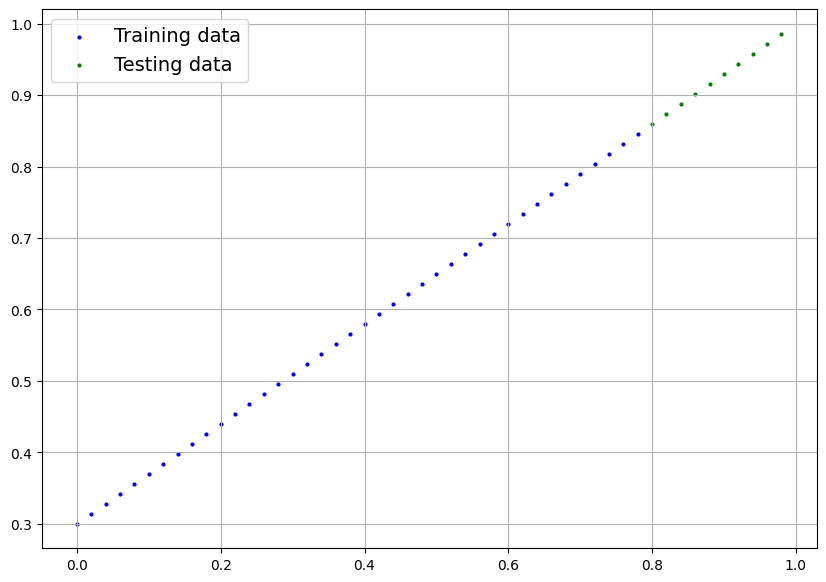

In [ ]:
plot_predictions()

### Buil a model

1. Gradiant descent
2. Backpropagation (forward propagation)

In [ ]:
from torch import nn
#CREATE A LINEAR REGRESSION MODEL CLASS
class LinearRegressionModel(nn.Module):
  """
  LINEAR REGRESSION MODEL CLASS
  """
  def __init__(self):
    super().__init__()
    #Use nn.Linear()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #Requieres gradient
                                            dtype=torch.float)) #Datatype
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True, #Requieres gradient
                                         dtype=torch.float)) #Datatype
    #self.linear_layer = nn.Linear(in_features=1,
    #                              out_features=1)
    #Methodes section in class
    #Forward methodes (métodos de avance) to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias #This is the liear regression formula








<h2>Usefull information about function in class<h2>
-> def forward(self, x: torch.Tensor) -> torch.Tensor: This line defines the function named forward.

-> def: The keyword used to define a function in Python.

-> forward: The name of the function. It's a convention in PyTorch to name the function that performs the forward pass of your model forward.

-> self: This refers to the instance of the class where this function is defined (typically a subclass of nn.Module for neural networks). It allows you to access attributes (like weights and biases) of your model.

-> x: torch.Tensor: This specifies that the function expects an input named x, and it should be a PyTorch tensor (torch.Tensor). This input usually represents the data your model is processing.

-> // -> torch.Tensor: This part is a type hint, indicating that the function is expected to return a PyTorch tensor (torch.Tensor). This is the output of your model's forward pass.
Inside the forward Function:

<h3> Calculations using self and x to produce output: This is where you define the actual computations of your model. You'll use the input x, the model's attributes (accessed via self), and PyTorch operations to calculate the output.
return output: The function returns the computed output, which is typically the result of passing the input through the layers of your neural network.<h3>

### Pytorch model building essentials

* Torch.nn -> Contains all of the building for computational graphs
* Troch.nn.Parameter -> what parameters should our model try and learn
* torch.nn.Module -> the base class for all nn modules.
* torch.optim ->  the optimizer in Python lives

## Checking the content of our Pytorch model

In [ ]:
#Create a random seed
#torch.manual_seed(42)

#Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0.parameters()
#Check the model parameters
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([-0.7703], requires_grad=True),
  Parameter containing:
  tensor([-0.9587], requires_grad=True)],
 OrderedDict([('weights', tensor([-0.7703])), ('bias', tensor([-0.9587]))]))

### Making predictions using 'torch.inference_mode()'

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[-1.5749],
        [-1.5903],
        [-1.6058],
        [-1.6212],
        [-1.6366],
        [-1.6520],
        [-1.6674],
        [-1.6828],
        [-1.6982],
        [-1.7136]], grad_fn=<AddBackward0>)

In [ ]:
#Make predictions with model
with torch.inference_mode(): #
  y_preds = model_0(X_test)

##You can do something similar with torch.no_grad()
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[-1.5749],
        [-1.5903],
        [-1.6058],
        [-1.6212],
        [-1.6366],
        [-1.6520],
        [-1.6674],
        [-1.6828],
        [-1.6982],
        [-1.7136]])

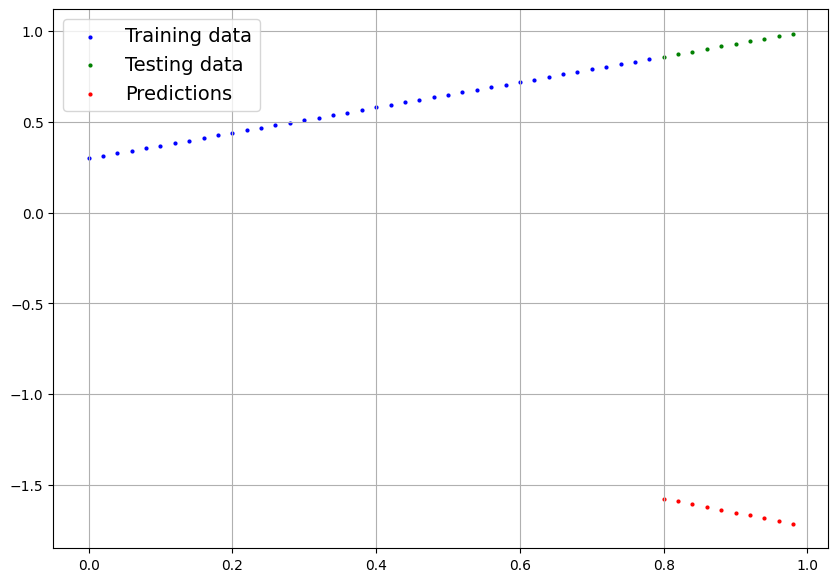

In [ ]:
y_test
plot_predictions(predictions=y_preds)

## 3. Training model
The whole idea of training is for a  model to move from some "unknow" parameters

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or wrong a module predictions are is to use a loss function.


In [ ]:
list(model_0.parameters()), model_0.state_dict(), list(model_0.parameters())

([Parameter containing:
  tensor([-0.7703], requires_grad=True),
  Parameter containing:
  tensor([-0.9587], requires_grad=True)],
 OrderedDict([('weights', tensor([-0.7703])), ('bias', tensor([-0.9587]))]),
 [Parameter containing:
  tensor([-0.7703], requires_grad=True),
  Parameter containing:
  tensor([-0.9587], requires_grad=True)])

In [ ]:
#Set up a loss function
loss_fn = nn.L1Loss()

#Set up an optimizer (Stochastic Gradiant Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)# learning rate -> important hiperparameter


###  Building a training loop in PyTorch

A couple ofthings we need in a training Loop:
1. Loop through the data.
2. Forward parr (thisinvolves data moving throughour model's 'forward()' functions) tomake predictions on data - also calles forward propagation.
3. Calculate the loss (compara forward pass predictions to ground truth labels)
4. Optimezer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameter of our model with respect to the loss (**backpropagation**).
6. Optimizer step - use otmizer to adjust our model's parameter to try and improve the loss (**gradient descent**)



In [ ]:
#list(model_0.eval().parameters())
with torch.no_grad():
  list(model_0.parameters())


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.7703], requires_grad=True),
 Parameter containing:
 tensor([-0.9587], requires_grad=True)]

In [ ]:
#Built a loop for the learning process
#An epoch is one loop through the data... (this is a hyperparameter because we've set it myself)

#Track different values (seguimiento de...)
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 500 #Define the number of loops


###Training
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train the model in PyTorch set all parameter that requiere gradient to requiere gradient

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward, backpropagation on the loss with respect to the parmeter of the model
  loss.backward()

  #5. Optimizer step
  optimizer.step() #By default how the optimizer change will accumulate through the loop so we have to zero them above in step 3.

  #Testing, Set the model to evaluation mode
  model_0.eval() #Turns off different settings in themodel not needed for evaluation/Testing (dropout/batch norm layers)


  with torch.inference_mode():#Turns off gradient tracking & a couple more
  #with torch.no_grad():# yOU MAY ALSO SEE TORCH.NO_GRAD() IN OLDER PYTORCH code things behind the scenes
    #1, Do the forward pass
    test_pred = model_0(X_test)
    #2. CALCULATE THE LOSS
    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happening
  if epoch % 20 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}')
    print(f'\nModel state:\n \t{model_0.state_dict()} \n')



  #Print out model state_dict()
  #print(f'\nModel state:\n \t{model_0.state_dict()} \n')

#print(f"Loss: {loss}")
#print(f'\nModel state:\n \t{model_0.state_dict()} \n')

Epoch: 0| Loss: 1.8321313858032227 | Test loss: 2.553797483444214

Model state:
 	OrderedDict([('weights', tensor([-0.7664])), ('bias', tensor([-0.9487]))]) 

Epoch: 20| Loss: 1.601711630821228 | Test loss: 2.2843775749206543

Model state:
 	OrderedDict([('weights', tensor([-0.6884])), ('bias', tensor([-0.7487]))]) 

Epoch: 40| Loss: 1.3712918758392334 | Test loss: 2.014958143234253

Model state:
 	OrderedDict([('weights', tensor([-0.6104])), ('bias', tensor([-0.5487]))]) 

Epoch: 60| Loss: 1.1408720016479492 | Test loss: 1.7455384731292725

Model state:
 	OrderedDict([('weights', tensor([-0.5324])), ('bias', tensor([-0.3487]))]) 

Epoch: 80| Loss: 0.9104522466659546 | Test loss: 1.476118564605713

Model state:
 	OrderedDict([('weights', tensor([-0.4544])), ('bias', tensor([-0.1487]))]) 

Epoch: 100| Loss: 0.6800323128700256 | Test loss: 1.2066987752914429

Model state:
 	OrderedDict([('weights', tensor([-0.3764])), ('bias', tensor([0.0513]))]) 

Epoch: 120| Loss: 0.4496123194694519 | 

In [ ]:
#Turn tensor variables in numpy arrays
#np.array(torch.tensor(loss_values).numpy()), test_loss_values

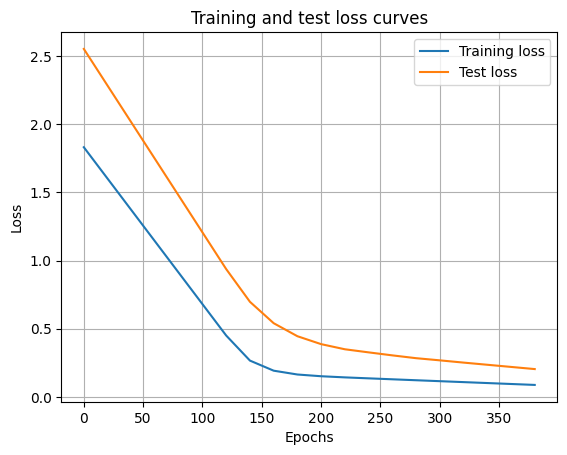

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Training loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend();


weight: (0.7,tensor([0.3002]))   ||   Bias: 0.3,tensor([0.4678]))




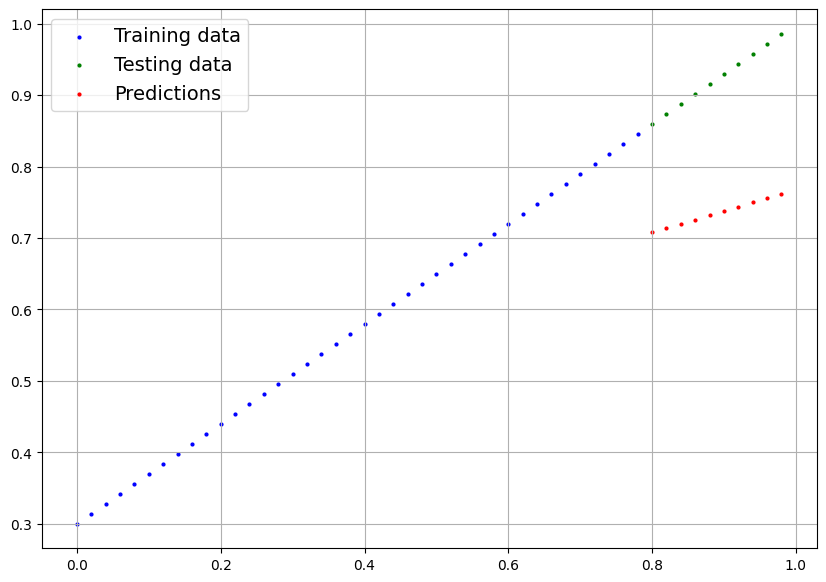

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
print(f'\nweight: ({weight},{model_0.state_dict()["weights"]})   ||   Bias: {bias},{model_0.state_dict()["bias"]})\n\n')
plot_predictions(predictions=y_preds_new)

### Saving a Model in Pytorch



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3002])), ('bias', tensor([0.4678]))])

In [ ]:
#Saving our PyTorch Model

from pathlib import Path

# 1.- Create module directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.- Create model save path
MODEL_NAME = '01_pytorch_workflow_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3.- SAve the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Feb 18 19:24 01_pytorch_workflow_model.pth


### Loading a Pytorch model

In [ ]:
#To load in a saved state_dict() we hae to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of a model_0

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

<ipython-input-27-7033ac286859>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.3002])), ('bias', tensor([0.4678]))])

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.7079],
        [0.7139],
        [0.7199],
        [0.7259],
        [0.7319],
        [0.7379],
        [0.7439],
        [0.7499],
        [0.7559],
        [0.7619]])